In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [33]:
data = pd.read_csv('/kaggle/input/wild-blueberry-yield-prediction-dataset/WildBlueberryPollinationSimulationData.csv')

In [34]:
data.shape

(777, 18)

In [35]:
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [36]:
data.isnull().sum().sort_values(ascending = False)

Row#                    0
clonesize               0
seeds                   0
fruitmass               0
fruitset                0
AverageRainingDays      0
RainingDays             0
AverageOfLowerTRange    0
MinOfLowerTRange        0
MaxOfLowerTRange        0
AverageOfUpperTRange    0
MinOfUpperTRange        0
MaxOfUpperTRange        0
osmia                   0
andrena                 0
bumbles                 0
honeybee                0
yield                   0
dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [38]:
Target = data['yield']
log_target=np.log(Target)


<Axes: >

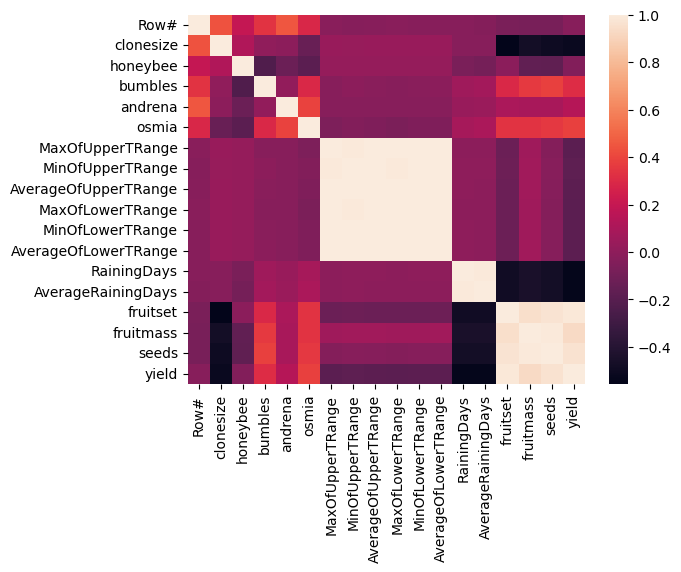

In [39]:
Corr = data.corr()
sns.heatmap(Corr)

In [43]:
X = data.drop(['yield'],axis=1)
y = data['yield']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((621, 17), (621,), (156, 17), (156,))

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define hyperparameters
params = {
    'n_estimators': 300,
    'learning_rate': 0.05,
    'min_samples_split': 5,
    'max_depth': 3,
    'min_samples_leaf': 2,
}

# Create the GradientBoostingRegressor with the specified hyperparameters
gbr_model = GradientBoostingRegressor(**params)


# Fit the model on the training data
gbr_model.fit(X, log_target)

GradientBoostingRegressor(learning_rate=0.05, min_samples_leaf=2,
                          min_samples_split=5, n_estimators=300)

In [45]:
from sklearn.model_selection import KFold, cross_val_score

# Specify the number of folds (k) for cross-validation
k = 5

# Create a KFold object with k folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the scores
scores = cross_val_score(gbr_model, X, log_target, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive values
positive_scores = -scores

# Calculate the mean and standard deviation of the scores
mean_score = np.mean(positive_scores)
std_score = np.std(positive_scores)

# Print the results
print("Mean MSE:", np.exp(np.sqrt(mean_score)))
print("Standard Deviation of MSE:", std_score)

Mean MSE: 1.0284203927388715
Standard Deviation of MSE: 0.0003473474258748522


In [49]:
predictions=np.exp(gbr_model.predict(X_test))

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Root Mean Squared Error (RMSE): 71.80407464175553
R-squared (R2) Score: 0.9973473185749929
